In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets
from pandas_profiling import ProfileReport

sns.set()
sns.set_theme(style = 'white')
%matplotlib inline

In [2]:
#import raw data
raw_data = pd.read_csv('BankChurners.csv')

In [3]:
#checking the dataframe
raw_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#dropping unnecessary columns
df = raw_data.copy()
df = df.drop(columns=['CLIENTNUM', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
#checking data types
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
#checking missing values
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

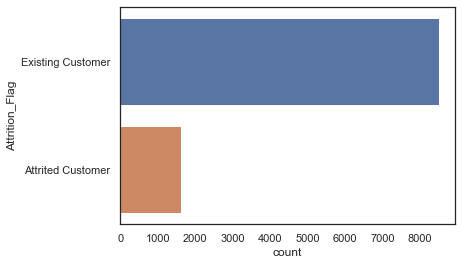

In [7]:
#checking data balance
sns.countplot(y = 'Attrition_Flag', data = df)
plt.show()

In [8]:
#undersampling non churn customer to match churn customer
attrited_number = len(df[df['Attrition_Flag'] == 'Attrited Customer'])
existing_indices = df[df['Attrition_Flag'] == 'Existing Customer'].index
np.random.seed(123)
random_indices = np.random.choice(existing_indices,attrited_number, replace=False)
attrited_indices = df[df['Attrition_Flag'] == 'Attrited Customer'].index
under_sample_indices = np.concatenate([attrited_indices,random_indices])
df = df.loc[under_sample_indices]

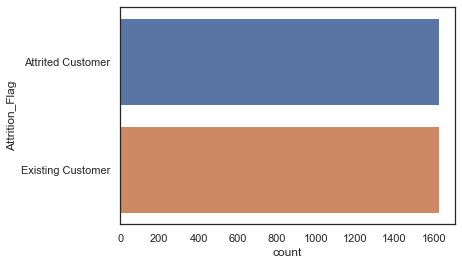

In [9]:
sns.countplot(y = 'Attrition_Flag', data = df)
plt.show()

In [10]:
#using pandas profiling for initial EDA
pandas_profiling_report = df.profile_report(
    title="Bank Churners Pandas Profiling Report", 
    explorative=True,
    html={'style': 
          {'full_width': True,
           'theme':'flatly'}
        }, 
     interactions = {'targets' : ['Attrition_Flag']} ,
    progress_bar=True)
pandas_profiling_report.to_file("Bank_Churners_pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#checking all unique values from all categorical features
for column in df.columns:
    if df[column].dtype == object:
        print(column, ':', df[column].unique())

Attrition_Flag : ['Attrited Customer' 'Existing Customer']
Gender : ['F' 'M']
Education_Level : ['Graduate' 'Doctorate' 'Unknown' 'High School' 'College' 'Uneducated'
 'Post-Graduate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['Less than $40K' 'Unknown' '$120K +' '$60K - $80K' '$40K - $60K'
 '$80K - $120K']
Card_Category : ['Blue' 'Silver' 'Gold' 'Platinum']


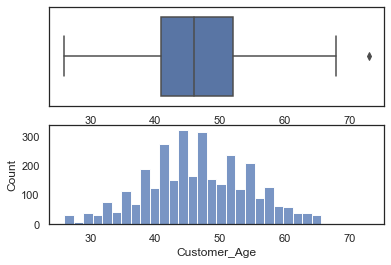

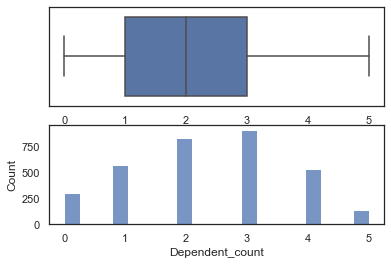

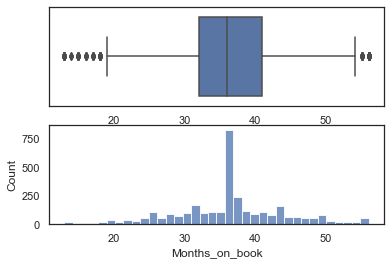

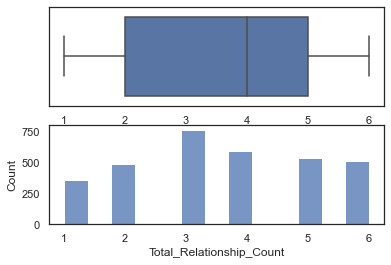

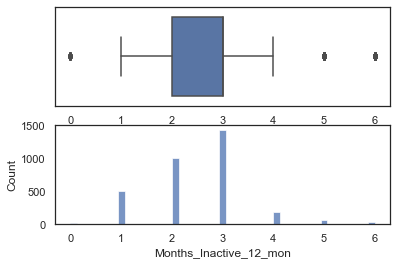

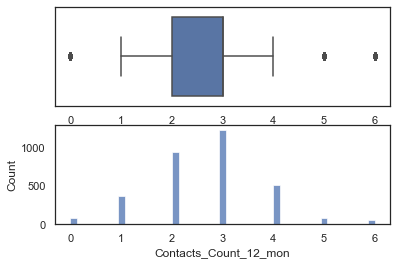

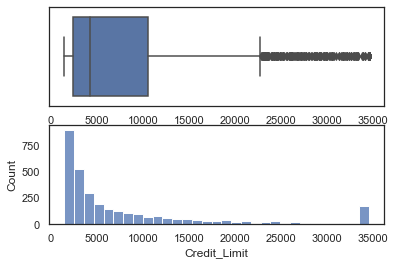

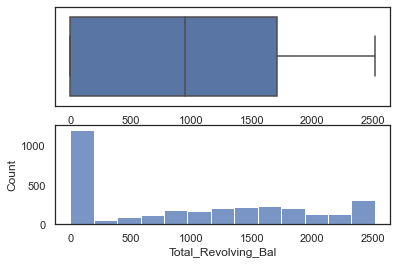

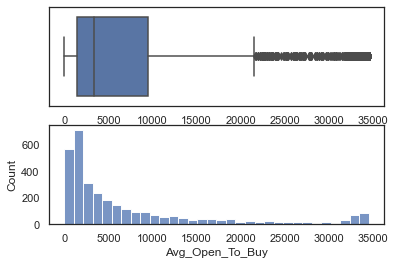

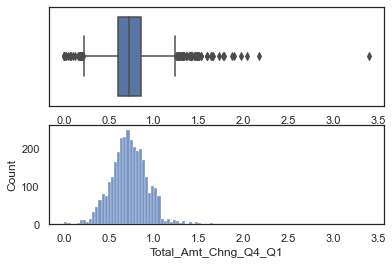

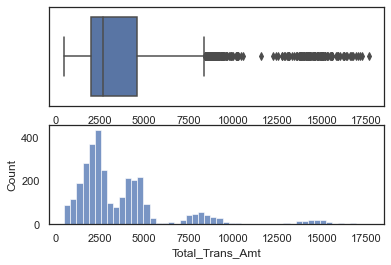

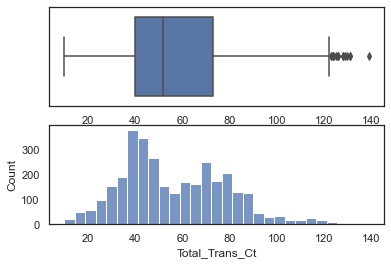

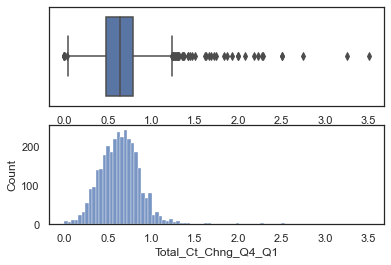

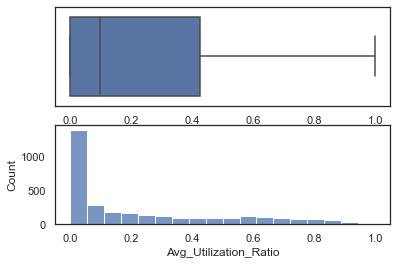

In [12]:
#checking distribution of all numerical features
for column in df.columns:
    if df[column].dtype != object:
        fig, ax = plt.subplots(2,1)
        sns.boxplot(x = column, data = df, ax = ax[0])
        sns.histplot(x = column, data = df, ax = ax[1])
        plt.show()

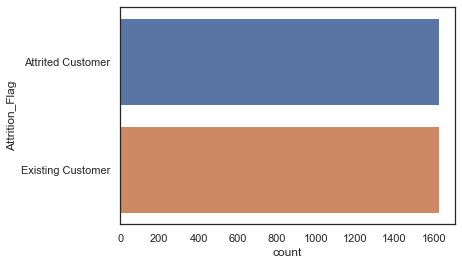

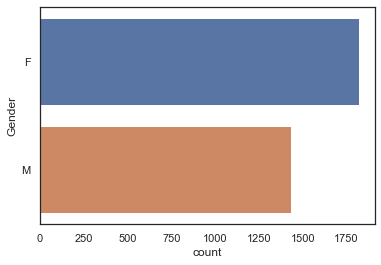

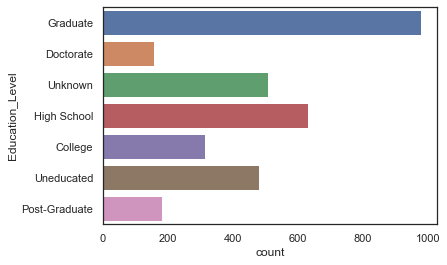

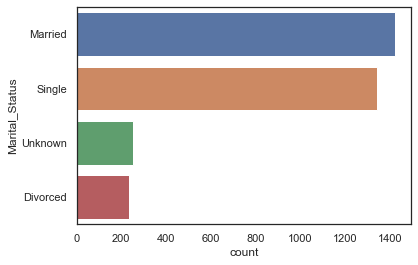

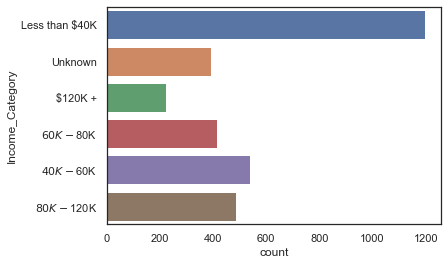

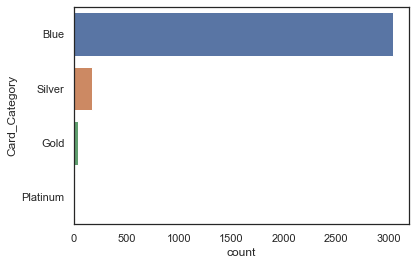

In [13]:
#checking distribution of all categorical features
for column in df.columns:
    if df[column].dtype == object:
        sns.countplot(y = column, data = df)
        plt.show()

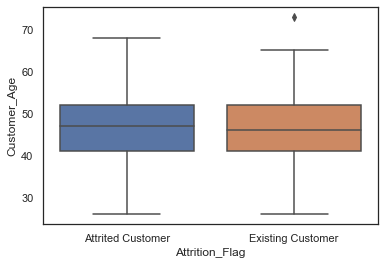

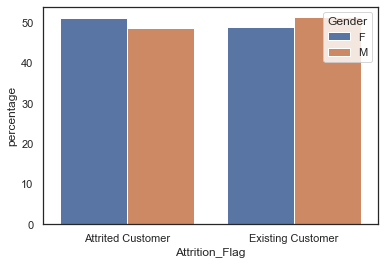

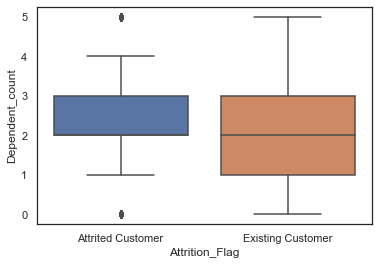

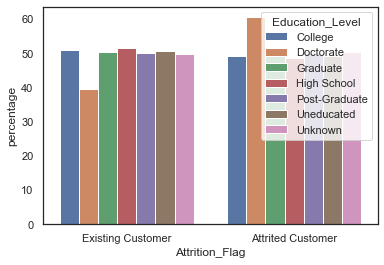

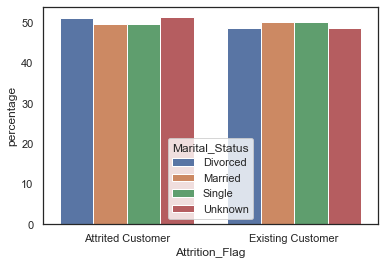

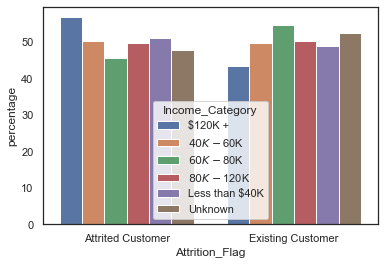

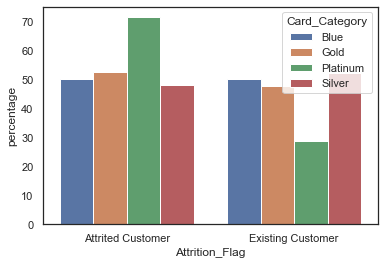

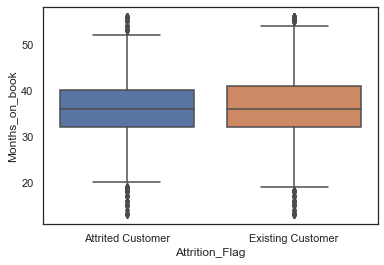

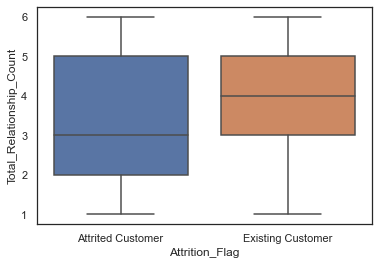

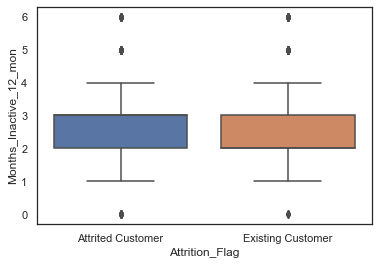

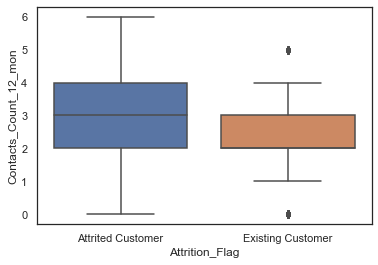

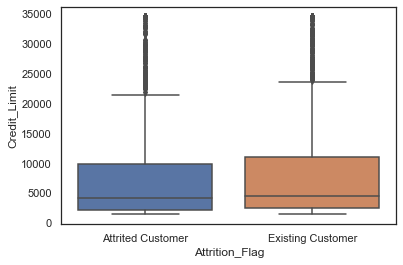

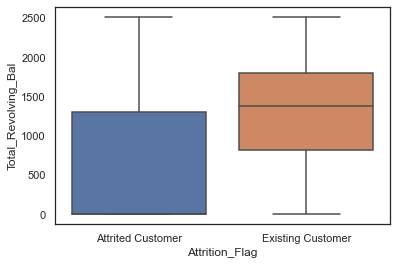

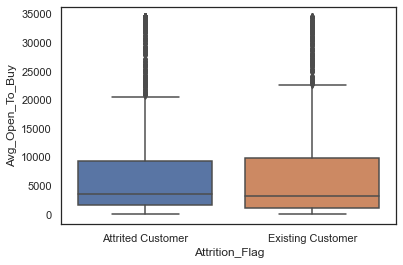

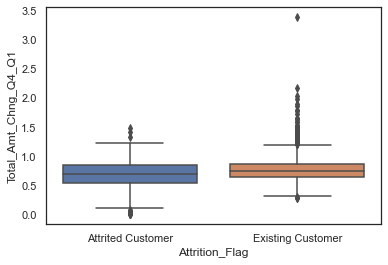

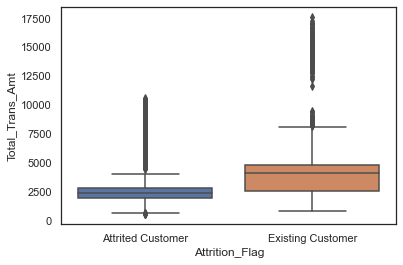

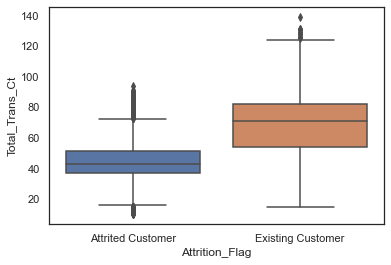

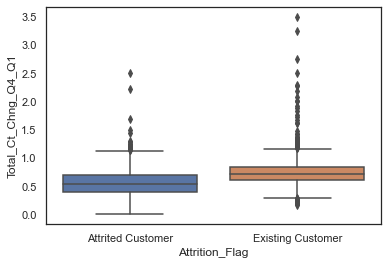

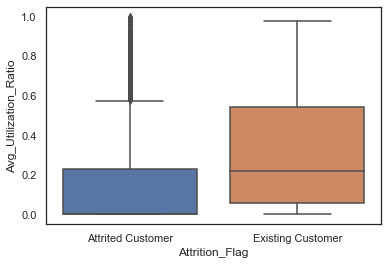

In [14]:
#doing visualization of the target to all features
for column in df.columns:
    if column != 'Attrition_Flag':
        if df[column].dtype != object:
            sns.boxplot(x = 'Attrition_Flag', y = column, data = df)
            plt.show()
        else :
            df_temp = df.groupby(by = column)['Attrition_Flag'].value_counts(normalize = True).rename('percentage').reset_index()
            df_temp['percentage'] = df_temp['percentage']*100

            sns.barplot(x = 'Attrition_Flag', y = 'percentage', data = df_temp, hue = column)
            plt.show()

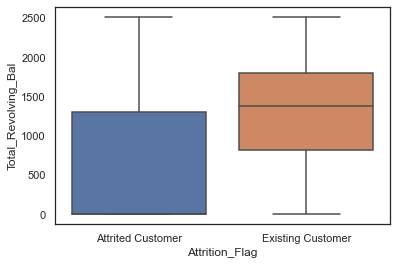

In [15]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal', data = df)
plt.show()

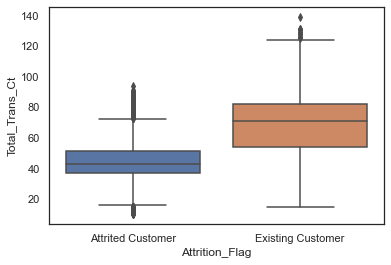

In [16]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Trans_Ct', data = df)
plt.show()

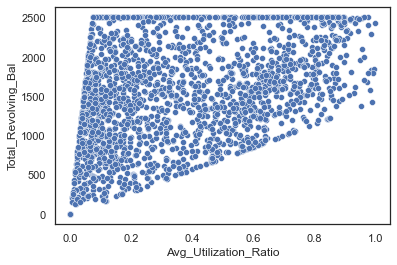

In [17]:
sns.scatterplot(x = 'Avg_Utilization_Ratio', y = 'Total_Revolving_Bal', data = df)
plt.show()

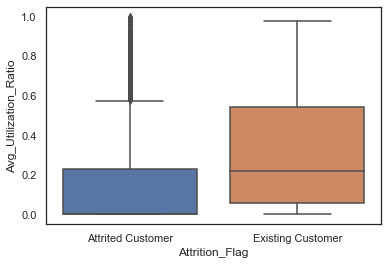

In [18]:
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio', data = df)
plt.show()

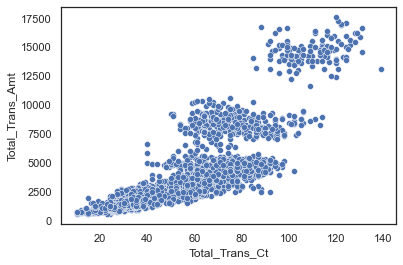

In [19]:
sns.scatterplot(x = 'Total_Trans_Ct', y = 'Total_Trans_Amt', data = df)
plt.show()

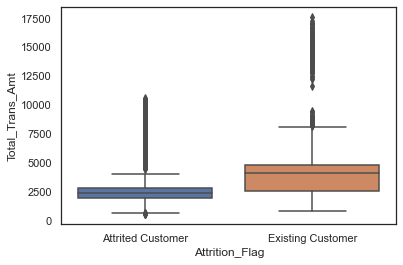

In [20]:
sns.boxplot(x = 'Attrition_Flag', y = 'Total_Trans_Amt', data = df)
plt.show()

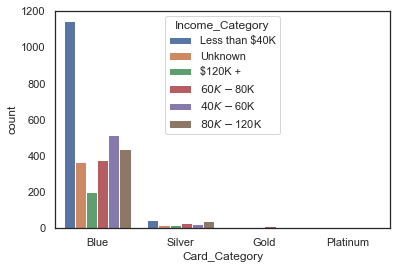

In [21]:
sns.countplot(x = 'Card_Category', data = df, hue = 'Income_Category')
plt.show()

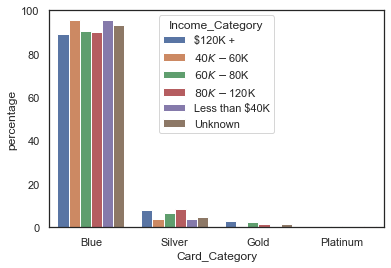

In [22]:
df_temp = df.groupby(by = 'Income_Category')['Card_Category'].value_counts(normalize = True).rename('percentage').reset_index()
df_temp['percentage'] = df_temp['percentage']*100

sns.barplot(x = 'Card_Category', y = 'percentage', data = df_temp, hue = 'Income_Category')
plt.show()